In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os 

In [2]:
def bruteForce(): 
    root = os.getcwd() 
    img1path = os.path.join(root,'C:\\Users\\Asad Computrs\\Downloads\\opencv-python-tutorials-main\\opencv-python-tutorials-main\\demoImages\\tesla.jpg')
    img2path = os.path.join(root,'C:\\Users\\Asad Computrs\\Downloads\\opencv-python-tutorials-main\\opencv-python-tutorials-main\\demoImages\\tesla2.jpg')
    img1 = cv.imread(img1path,cv.IMREAD_GRAYSCALE) 
    img2 = cv.imread(img2path,cv.IMREAD_GRAYSCALE) 
    orb = cv.ORB_create()
    keypoint1, descriptor1 = orb.detectAndCompute(img1,None)
    keypoint2, descriptor2 = orb.detectAndCompute(img2,None)
    bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
    matches = bf.match(descriptor1,descriptor2)
    matches = sorted(matches, key = lambda x:x.distance)
    nMatches = 20 
    imgMatch = cv.drawMatches(img1,keypoint1,img2,keypoint2,matches[:nMatches],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure() 
    plt.imshow(imgMatch)
    plt.show()


In [3]:
def knnBruteForce(): 
    root = os.getcwd() 
    img1path = os.path.join(root,'dC:\\Users\\Asad Computrs\\Downloads\\opencv-python-tutorials-main\\opencv-python-tutorials-main\\demoImages\\tesla.jpg')
    img2path = os.path.join(root,'C:\\Users\\Asad Computrs\\Downloads\\opencv-python-tutorials-main\\opencv-python-tutorials-main\\demoImages\\tesla2.jpg')
    img1 = cv.imread(img1path,cv.IMREAD_GRAYSCALE) 
    img2 = cv.imread(img2path,cv.IMREAD_GRAYSCALE) 
    sift = cv.SIFT_create()
    keypoints1, descriptor1 = sift.detectAndCompute(img1,None)
    keypoints2, descriptor2 = sift.detectAndCompute(img2,None)
    bf = cv.BFMatcher()
    nNeighbors = 2 

    # this will take awhile....(pause video)
    matches = bf.knnMatch(descriptor1,descriptor2,k=nNeighbors)
    goodMatches = []
    testRatio = 0.75 # reference Lowe's paper 
    for m,n in matches: # m and n are the 2 neighbors 
        if m.distance < testRatio*n.distance:
            goodMatches.append([m])
    imgMatch = cv.drawMatchesKnn(img1,keypoints1,img2,keypoints2,goodMatches,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    plt.figure() 
    plt.imshow(imgMatch)
    plt.show()



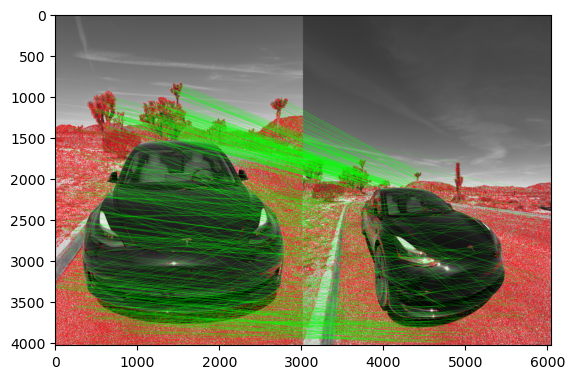

In [4]:
def FLANN(): 
    root = os.getcwd() 
    img1path = os.path.join(root,'C:\\Users\\Asad Computrs\\Downloads\\opencv-python-tutorials-main\\opencv-python-tutorials-main\\demoImages\\tesla.jpg')
    img2path = os.path.join(root,'C:\\Users\\Asad Computrs\\Downloads\\opencv-python-tutorials-main\\opencv-python-tutorials-main\\demoImages\\tesla2.jpg')
    img1 = cv.imread(img1path,cv.IMREAD_GRAYSCALE) 
    img2 = cv.imread(img2path,cv.IMREAD_GRAYSCALE) 
    sift = cv.SIFT_create()
    keypoints1, descriptor1 = sift.detectAndCompute(img1,None)
    keypoints2, descriptor2 = sift.detectAndCompute(img2,None)
    FLANN_INDEX_KDTREE = 1
    nKDtrees = 5 
    nLeafChecks = 50
    nNeighbors = 2 
    indexParams = dict(algorithm = FLANN_INDEX_KDTREE, trees = nKDtrees)
    searchParams = dict(checks=nLeafChecks) 
    flann = cv.FlannBasedMatcher(indexParams,searchParams)
    matches = flann.knnMatch(descriptor1,descriptor2,k=nNeighbors)
    matchesMask = [[0,0] for i in range(len(matches))]
    testRatio = 0.75 # ratio test as per Lowe's paper
    for i,(m,n) in enumerate(matches):
        if m.distance < testRatio*n.distance:
            matchesMask[i]=[1,0]
    drawParams = dict(matchColor = (0,255,0),singlePointColor = (255,0,0),
        matchesMask = matchesMask,flags = cv.DrawMatchesFlags_DEFAULT)
    imgMatch = cv.drawMatchesKnn(img1,keypoints1,img2,keypoints2,matches,None,**drawParams)

    plt.figure() 
    plt.imshow(imgMatch)
    plt.show()

if __name__ == '__main__': 
    # bruteForce() 
    # knnBruteForce() 
    FLANN()    